In [ ]:
!pip install pytorch-tabnet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.5/44.5 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 89.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 74.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 44.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 81.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling

In [ ]:
!pip install tensorflow

In [ ]:
import pandas as pd
import numpy as np
from tabulate import tabulate
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve
from sklearn.utils.class_weight import compute_class_weight
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTENC

In [ ]:
# === Load and preprocess data ===
df = pd.read_csv("carclaims.csv")
df['FraudFound'] = df['FraudFound'].map({'No': 0, 'Yes': 1})
df_nn = df.copy()

In [ ]:
df_nn.drop(['PolicyNumber','RepNumber'],inplace=True,axis=1)
# Convert all column names to lowercase
df_nn.columns = df_nn.columns.str.lower().str.strip()
# Convert all string (object) columns to lowercase
for col in df_nn.select_dtypes(include='object').columns:
    df_nn[col] = df_nn[col].str.lower().str.strip()
df_nn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   month                 15420 non-null  object
 1   weekofmonth           15420 non-null  int64 
 2   dayofweek             15420 non-null  object
 3   make                  15420 non-null  object
 4   accidentarea          15420 non-null  object
 5   dayofweekclaimed      15420 non-null  object
 6   monthclaimed          15420 non-null  object
 7   weekofmonthclaimed    15420 non-null  int64 
 8   sex                   15420 non-null  object
 9   maritalstatus         15420 non-null  object
 10  age                   15420 non-null  int64 
 11  fault                 15420 non-null  object
 12  policytype            15420 non-null  object
 13  vehiclecategory       15420 non-null  object
 14  vehicleprice          15420 non-null  object
 15  deductible            15420 non-null

In [ ]:
# Mapping months and days
# month_map = {'jan':1, 'feb':2, 'mar':3, 'apr':4, 'may':5, 'jun':6,
#              'jul':7, 'aug':8, 'sep':9, 'oct':10, 'nov':11, 'dec':12}
# day_map = {
#     'monday':1, 'tuesday':2, 'wednesday':3, 'thursday':4,
#     'friday':5, 'saturday':6, 'sunday':7
# }
# df_nn['month'] = df_nn['month'].map(month_map)
# df_nn['monthclaimed'] = df_nn['monthclaimed'].map(month_map)
# df_nn['dayofweek'] = df_nn['dayofweek'].map(day_map)
# df_nn['dayofweekclaimed'] = df_nn['dayofweekclaimed'].map(day_map)


In [ ]:
time_cols = ["month", "monthclaimed", "dayofweek", "dayofweekclaimed"]

In [ ]:
print(tabulate(df_nn.head(10), headers='keys', tablefmt='fancy_grid'))

╒════╤═════════╤═══════════════╤═════════════╤════════╤════════════════╤════════════════════╤════════════════╤══════════════════════╤════════╤═════════════════╤═══════╤═══════════════╤══════════════════════╤═══════════════════╤══════════════════╤══════════════╤════════════════╤════════════════════════╤═════════════════════╤══════════════════════╤════════════════╤═════════════════════╤═════════════════════╤══════════════════╤═════════════╤═══════════════════════╤═══════════════════════╤════════════════╤════════╤══════════════╤══════════════╕
│    │ month   │   weekofmonth │ dayofweek   │ make   │ accidentarea   │ dayofweekclaimed   │ monthclaimed   │   weekofmonthclaimed │ sex    │ maritalstatus   │   age │ fault         │ policytype           │ vehiclecategory   │ vehicleprice     │   deductible │   driverrating │ days:policy-accident   │ days:policy-claim   │ pastnumberofclaims   │ ageofvehicle   │ ageofpolicyholder   │ policereportfiled   │ witnesspresent   │ agenttype   │ numberofsu

In [ ]:
# Define mappings for additional ordinal features
ordinal_mappings = {

    'ageofvehicle': {
        'new': 0, '2 years': 1, '3 years': 2, '4 years': 3, '5 years': 4,
        '6 years': 5, '7 years': 6, 'more than 7': 7
    },
    'ageofpolicyholder': {
        '16 to 17': 0, '18 to 20': 1, '21 to 25': 2, '26 to 30': 3,
        '31 to 35': 4, '36 to 40': 5, '41 to 50': 6, '51 to 65': 7,
        'over 65': 8
    },
    'numberofcars': {
        '1 vehicle': 1, '2 vehicles': 2, '3 to 4': 3, '5 to 8': 5
    },
    'numberofsuppliments': {
        'none': 0, '1 to 2': 1, '3 to 5': 2, 'more than 5': 3
    },

    'pastnumberofclaims': {
        'none': 0, '1': 1, '2 to 4': 2, 'more than 4': 3
    },

    'vehicleprice': {
        'less than 20,000': 0, '20,000 to 29,000': 1, '30,000 to 39,000': 2,
        '40,000 to 59,000': 3, '60,000 to 69,000': 4, 'more than 69,000': 5
    },

    'days:policy-accident': {
        'none': 0, '1 to 7': 1, '8 to 15': 2, '15 to 30': 3, 'more than 30': 4
    },
    'days:policy-claim': {
        'none': 0, '1 to 7': 1, '8 to 15': 2, '15 to 30': 3, 'more than 30': 4
    },
    'addresschange-claim': {
        'no change': 0, 'under 6 months': 1, '1 year': 2, '2 to 3 years': 3, '4 to 8 years': 4
    }
}

# Apply mappings
for col, mapping in ordinal_mappings.items():
    df_nn[col] = df_nn[col].map(mapping)

# Frequency encoding for Make
df_nn['make_freq'] = df_nn['make'].map(df_nn['make'].value_counts(normalize=True))
df_nn.drop(columns=['make'], inplace=True)
df_nn.drop(columns=['year'], inplace=True)

In [ ]:
print(tabulate(df_nn.head(5), headers='keys', tablefmt='fancy_grid'))

╒════╤═════════╤═══════════════╤═════════════╤════════════════╤════════════════════╤════════════════╤══════════════════════╤════════╤═════════════════╤═══════╤═══════════════╤═══════════════════╤═══════════════════╤════════════════╤══════════════╤════════════════╤════════════════════════╤═════════════════════╤══════════════════════╤════════════════╤═════════════════════╤═════════════════════╤══════════════════╤═════════════╤═══════════════════════╤═══════════════════════╤════════════════╤══════════════╤══════════════╤═════════════╕
│    │ month   │   weekofmonth │ dayofweek   │ accidentarea   │ dayofweekclaimed   │ monthclaimed   │   weekofmonthclaimed │ sex    │ maritalstatus   │   age │ fault         │ policytype        │ vehiclecategory   │   vehicleprice │   deductible │   driverrating │   days:policy-accident │   days:policy-claim │   pastnumberofclaims │   ageofvehicle │   ageofpolicyholder │ policereportfiled   │ witnesspresent   │ agenttype   │   numberofsuppliments │   address

In [ ]:
# One-hot encoding
low_card_cols = ['accidentarea', 'sex', 'maritalstatus', 'fault', 'policytype',
                 'vehiclecategory', 'basepolicy', 'agenttype',
                 'policereportfiled', 'witnesspresent','year']
df_nn = pd.get_dummies(df_nn, columns=low_card_cols.append(time_cols), drop_first=True)

In [ ]:
# === Convert any boolean one-hot columns to integers ===
bool_cols = df_nn.select_dtypes(include='bool').columns
df_nn[bool_cols] = df_nn[bool_cols].astype(int)

In [ ]:
print(tabulate(df_nn.head(5), headers='keys', tablefmt='fancy_grid'))

╒════╤═══════════════╤══════════════════════╤═══════╤════════════════╤══════════════╤════════════════╤════════════════════════╤═════════════════════╤══════════════════════╤════════════════╤═════════════════════╤═══════════════════════╤═══════════════════════╤════════════════╤══════════════╤═════════════╤═════════════╤═════════════╤═════════════╤═════════════╤═════════════╤═════════════╤═════════════╤═════════════╤═════════════╤═════════════╤═════════════╤════════════════════╤══════════════════════╤════════════════════╤══════════════════════╤═════════════════════╤═══════════════════════╤══════════════════════╤═══════════════════════════╤═══════════════════════════╤═════════════════════════════╤═══════════════════════════╤═════════════════════════════╤════════════════════════════╤══════════════════════════════╤════════════════════╤════════════════════╤════════════════════╤════════════════════╤════════════════════╤════════════════════╤════════════════════╤════════════════════╤════════════

In [ ]:
print(np.any(np.isnan(df_nn)))
print(np.any(np.isinf(df_nn)))


True
False


In [ ]:
rows_with_nan = df_nn[df_nn.isnull().any(axis=1)]
print(tabulate(rows_with_nan.head(5), headers='keys', tablefmt='fancy_grid'))

╒═════╤═══════════════╤══════════════════════╤═══════╤════════════════╤══════════════╤════════════════╤════════════════════════╤═════════════════════╤══════════════════════╤════════════════╤═════════════════════╤═══════════════════════╤═══════════════════════╤════════════════╤══════════════╤═════════════╤═════════════╤═════════════╤═════════════╤═════════════╤═════════════╤═════════════╤═════════════╤═════════════╤═════════════╤═════════════╤═════════════╤════════════════════╤══════════════════════╤════════════════════╤══════════════════════╤═════════════════════╤═══════════════════════╤══════════════════════╤═══════════════════════════╤═══════════════════════════╤═════════════════════════════╤═══════════════════════════╤═════════════════════════════╤════════════════════════════╤══════════════════════════════╤════════════════════╤════════════════════╤════════════════════╤════════════════════╤════════════════════╤════════════════════╤════════════════════╤════════════════════╤═══════════

In [ ]:
df_nn.dropna(inplace=True)

In [ ]:
# === Split Features and Labels ===
X = df_nn.drop(columns='fraudfound')
y = df_nn['fraudfound']

In [ ]:
one_hot_cols = [col for col in X.columns if set(X[col].dropna().unique()) <= {0, 1}]

In [ ]:
# === Identify one-hot categorical columns ===
categorical_feature_indices = [i for i, col in enumerate(X.columns) if set(X[col].unique()) <= {0, 1}]


In [ ]:
numeric_cols = X.columns.difference([X.columns[i] for i in categorical_feature_indices])

In [ ]:
# === Train/Test Split ===
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

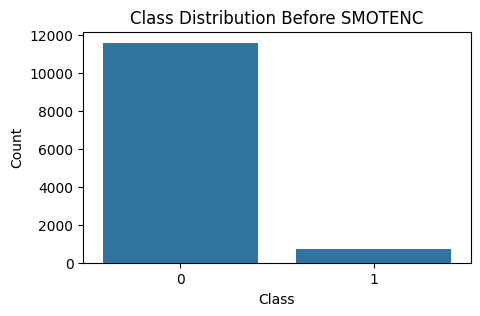

In [ ]:
# === Visualize class imbalance before SMOTENC ===
plt.figure(figsize=(5, 3))
sns.countplot(x=y_train)
plt.title("Class Distribution Before SMOTENC")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

In [ ]:
# === Apply SMOTENC ===
smote_nc = SMOTENC(categorical_features=categorical_feature_indices,sampling_strategy=0.7, random_state=42)
X_train_res, y_train_res = smote_nc.fit_resample(X_train, y_train)

In [ ]:
type(y_train_res)

pandas.core.series.Series

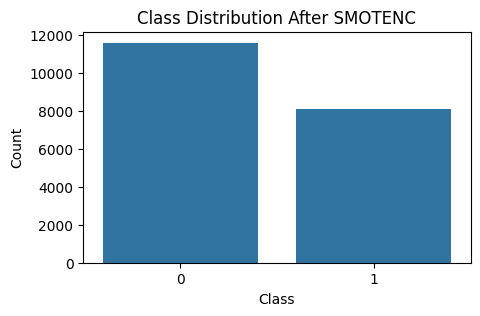

In [ ]:
# === Visualize class distribution after SMOTENC ===
plt.figure(figsize=(5, 3))
sns.countplot(x=y_train_res)
plt.title("Class Distribution After SMOTENC")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

In [ ]:
# Cyclical encoding
# for col, max_val in [('month', 12), ('monthclaimed', 12),
#                      ('dayofweek', 7), ('dayofweekclaimed', 7),
#                      ('weekofmonth', 5), ('weekofmonthclaimed', 5)]:
#     df_nn[f'{col}_sin'] = np.sin(2 * np.pi * df_nn[col] / max_val)
#     df_nn[f'{col}_cos'] = np.cos(2 * np.pi * df_nn[col] / max_val)
#     df_nn.drop(columns=col, inplace=True)

In [ ]:
# === Scale numeric features only ===
numeric_cols = X.columns.difference([X.columns[i] for i in categorical_feature_indices])
scaler = StandardScaler()
X_train_res[numeric_cols] = scaler.fit_transform(X_train_res[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

In [ ]:
## write to csv
# X_train_res_df = pd.DataFrame(X_train_res, columns=X_train_res.columns)
# y_train_res1 = y_train_res.reset_index(drop=True)
# y_train_res_df = pd.DataFrame(y_train_res1)
# X_test_df = pd.DataFrame(X_test, columns=X_test.columns)
# y_test_1 = y_test.reset_index(drop=True)
# y_test_df = pd.DataFrame(y_test)




In [ ]:
# y_train_res_df.head()

In [ ]:

# X_train_res_df.to_csv('X_train_resampled.csv', index=False)
# y_train_res_df.to_csv('y_train_resampled.csv', index=False)
# X_test_df.to_csv('X_test.csv', index=False)
# # y_test_df.to_csv('y_test.csv', index=False)

In [ ]:
# y_train_res_df

In [ ]:
print(tabulate(X_train_res.head(5), headers='keys', tablefmt='fancy_grid'))

╒════╤═══════════════╤══════════════════════╤════════════╤════════════════╤══════════════╤════════════════╤════════════════════════╤═════════════════════╤══════════════════════╤════════════════╤═════════════════════╤═══════════════════════╤═══════════════════════╤════════════════╤═════════════╤═════════════╤═════════════╤═════════════╤═════════════╤═════════════╤═════════════╤═════════════╤═════════════╤═════════════╤═════════════╤═════════════╤════════════════════╤══════════════════════╤════════════════════╤══════════════════════╤═════════════════════╤═══════════════════════╤══════════════════════╤═══════════════════════════╤═══════════════════════════╤═════════════════════════════╤═══════════════════════════╤═════════════════════════════╤════════════════════════════╤══════════════════════════════╤════════════════════╤════════════════════╤════════════════════╤════════════════════╤════════════════════╤════════════════════╤════════════════════╤════════════════════╤════════════════════╤═

# TABNET CLASSIFIER

In [ ]:
from pytorch_tabnet.tab_model import TabNetClassifier
from sklearn.metrics import classification_report, roc_auc_score
import numpy as np

In [ ]:
X_train_res.values

array([[ 0.19339665,  1.07556334, -0.85733457, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.97958258, -0.53330136,  2.67971665, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.97958258, -0.53330136,  0.17430537, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 1.76576851, -0.53330136,  1.50069958, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.97958258, -1.33773371,  0.69012534, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.97958258,  0.27113099,  0.1006168 , ...,  0.        ,
         0.        ,  0.        ]])

In [ ]:
clf = TabNetClassifier(verbose=1)
clf.fit(
    X_train_res.values,  # Convert X_train_res to a NumPy array
    y_train_res,
    eval_set=[(X_test.values, y_test)], # Convert X_test to a NumPy array
    eval_metric=['auc'],
    patience=10,
    max_epochs=100,
    batch_size=512,
    virtual_batch_size=128
)

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.61707 | val_0_auc: 0.69775 |  0:00:04s
epoch 1  | loss: 0.43635 | val_0_auc: 0.64475 |  0:00:06s
epoch 2  | loss: 0.27459 | val_0_auc: 0.71305 |  0:00:08s
epoch 3  | loss: 0.20669 | val_0_auc: 0.72261 |  0:00:10s
epoch 4  | loss: 0.17863 | val_0_auc: 0.76473 |  0:00:12s
epoch 5  | loss: 0.16255 | val_0_auc: 0.75014 |  0:00:14s
epoch 6  | loss: 0.1542  | val_0_auc: 0.75023 |  0:00:17s
epoch 7  | loss: 0.14974 | val_0_auc: 0.67401 |  0:00:18s
epoch 8  | loss: 0.14695 | val_0_auc: 0.66999 |  0:00:20s
epoch 9  | loss: 0.1466  | val_0_auc: 0.64971 |  0:00:22s
epoch 10 | loss: 0.14085 | val_0_auc: 0.76303 |  0:00:24s
epoch 11 | loss: 0.14069 | val_0_auc: 0.65485 |  0:00:26s
epoch 12 | loss: 0.14019 | val_0_auc: 0.6382  |  0:00:29s
epoch 13 | loss: 0.13584 | val_0_auc: 0.66639 |  0:00:31s
epoch 14 | loss: 0.13419 | val_0_auc: 0.68619 |  0:00:33s

Early stopping occurred at epoch 14 with best_epoch = 4 and best_val_0_auc = 0.76473


/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


In [ ]:
y_pred_probs = clf.predict_proba(X_test.values)[:, 1] # Convert X_test to a NumPy array before prediction

# Threshold tuning
from sklearn.metrics import precision_recall_curve

prec, rec, thresholds = precision_recall_curve(y_test, y_pred_probs)
f1_scores = 2 * (prec * rec) / (prec + rec + 1e-8)
best_thresh = thresholds[np.argmax(f1_scores)]

print(f"Optimal Threshold: {best_thresh:.2f}")

# Final prediction
y_pred = (y_pred_probs >= best_thresh).astype(int)

print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_probs))

Optimal Threshold: 0.18
              precision    recall  f1-score   support

           0       0.98      0.65      0.78      2899
           1       0.13      0.81      0.22       185

    accuracy                           0.66      3084
   macro avg       0.55      0.73      0.50      3084
weighted avg       0.93      0.66      0.75      3084

ROC-AUC: 0.7647259539636221


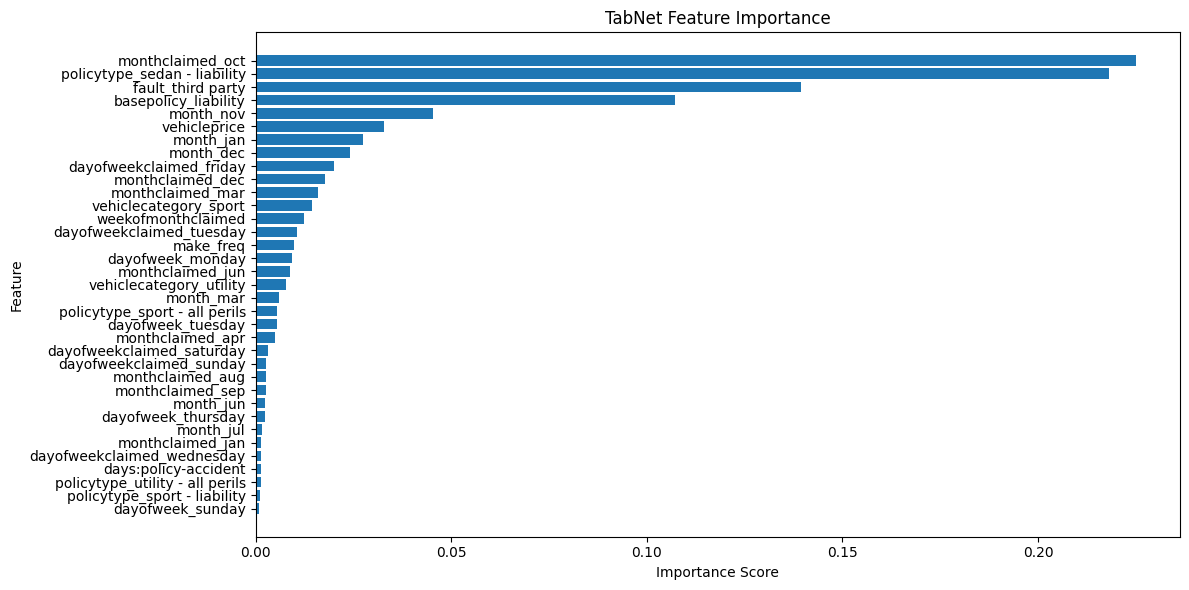

In [ ]:
# Get importance scores
importances = clf.feature_importances_

# Create a DataFrame with feature names
feature_importance_df = pd.DataFrame({
    'feature': X_train_res.columns,
    'importance': importances
})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)
feature_importance_df = feature_importance_df.head(35)

# Plot
plt.figure(figsize=(12, 6))
plt.barh(feature_importance_df['feature'], feature_importance_df['importance'])
plt.gca().invert_yaxis()
plt.title('TabNet Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

In [ ]:
top_features = feature_importance_df['feature'].head(40).tolist()
X_train_top = X_train_res[top_features]
X_test_top = X_test[top_features]

TabNet with top 20 Features

In [ ]:
clf = TabNetClassifier(verbose=1)
clf.fit(
    X_train_top.values,  # Convert X_train_res to a NumPy array
    y_train_res,
    eval_set=[(X_test_top.values, y_test)], # Convert X_test to a NumPy array
    eval_metric=['auc'],
    patience=10,
    max_epochs=100,
    batch_size=1024,
    virtual_batch_size=256
)

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.51202 | val_0_auc: 0.57732 |  0:00:01s
epoch 1  | loss: 0.37749 | val_0_auc: 0.54544 |  0:00:02s
epoch 2  | loss: 0.33092 | val_0_auc: 0.64862 |  0:00:03s
epoch 3  | loss: 0.3058  | val_0_auc: 0.66864 |  0:00:05s
epoch 4  | loss: 0.29381 | val_0_auc: 0.6612  |  0:00:06s
epoch 5  | loss: 0.28874 | val_0_auc: 0.62345 |  0:00:07s
epoch 6  | loss: 0.28622 | val_0_auc: 0.63845 |  0:00:08s
epoch 7  | loss: 0.2808  | val_0_auc: 0.65076 |  0:00:09s
epoch 8  | loss: 0.2741  | val_0_auc: 0.61529 |  0:00:11s
epoch 9  | loss: 0.27197 | val_0_auc: 0.65294 |  0:00:12s
epoch 10 | loss: 0.26679 | val_0_auc: 0.64782 |  0:00:13s
epoch 11 | loss: 0.26533 | val_0_auc: 0.66215 |  0:00:14s
epoch 12 | loss: 0.26151 | val_0_auc: 0.66922 |  0:00:15s
epoch 13 | loss: 0.26273 | val_0_auc: 0.67756 |  0:00:17s
epoch 14 | loss: 0.25898 | val_0_auc: 0.64995 |  0:00:18s
epoch 15 | loss: 0.2567  | val_0_auc: 0.65054 |  0:00:19s
epoch 16 | loss: 0.25611 | val_0_auc: 0.62347 |  0:00:21s
epoch 17 | los

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


In [ ]:
y_pred_probs = clf.predict_proba(X_test_top.values)[:, 1] # Convert X_test to a NumPy array before prediction

# Threshold tuning
from sklearn.metrics import precision_recall_curve

prec, rec, thresholds = precision_recall_curve(y_test, y_pred_probs)
f1_scores = 2 * (prec * rec) / (prec + rec + 1e-8)
best_thresh = thresholds[np.argmax(f1_scores)]

print(f"Optimal Threshold: {best_thresh:.2f}")

# Final prediction
y_pred = (y_pred_probs >= best_thresh).astype(int)

print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_probs))

Optimal Threshold: 0.20
              precision    recall  f1-score   support

           0       0.95      0.82      0.88      2899
           1       0.12      0.38      0.18       185

    accuracy                           0.80      3084
   macro avg       0.54      0.60      0.53      3084
weighted avg       0.90      0.80      0.84      3084

ROC-AUC: 0.6775626264415502


# DNN with BatchNormalization , LeakyRELU , Focal Loss and Optimized Threshold

DLM 1 (use only oversampling)

In [ ]:
# === Use only oversampling  ===
from tensorflow.keras.layers import LeakyReLU
model = Sequential([
    Dense(128, input_shape=(X_train_top.shape[1],)),
    LeakyReLU(alpha=0.01),  # First layer with LeakyReLU
    BatchNormalization(),
    Dropout(0.3),

    Dense(64),
    LeakyReLU(alpha=0.01),  # Second layer with LeakyReLU
    BatchNormalization(),
    Dropout(0.3),

    Dense(32, activation='relu'),  # Rest of the layers remain the same
    BatchNormalization(),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),

    Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
# y_test = y_test.values.ravel()
# y_train_res = y_train_res.values.ravel()

# Create EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=20,          # Stop after 5 epochs with no improvement
    restore_best_weights=True  # Restore weights from the best epoch
)

def focal_loss(gamma=2., alpha=0.25):
    def focal_loss_fixed(y_true, y_pred):
        epsilon = 1e-7
        y_pred = tf.clip_by_value(y_pred, epsilon, 1. - epsilon)
        cross_entropy = -y_true * tf.math.log(y_pred) - (1 - y_true) * tf.math.log(1 - y_pred)
        weight = alpha * tf.pow(1 - y_pred, gamma) * y_true + (1 - alpha) * tf.pow(y_pred, gamma) * (1 - y_true)
        return tf.reduce_mean(weight * cross_entropy)
    return focal_loss_fixed

# Compile
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss=focal_loss(gamma=2., alpha=0.25),
    # loss='binary_crossentropy',
    metrics=[
        'accuracy',
        tf.keras.metrics.AUC(name='auc')
    ]
)


# Fit model with EarlyStopping callback
history = model.fit(
    X_train_top, y_train_res,
    validation_split=0.33,
    epochs=60,
    batch_size=1024,
    verbose=1,
    # callbacks=[early_stopping]  # Pass the callback here
)

Epoch 1/60
13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 54ms/step - accuracy: 0.8954 - auc: 0.9044 - loss: 0.0231 - val_accuracy: 0.5661 - val_auc: 0.0000e+00 - val_loss: 0.0630
Epoch 2/60
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.8970 - auc: 0.9078 - loss: 0.0223 - val_accuracy: 0.5500 - val_auc: 0.0000e+00 - val_loss: 0.0634
Epoch 3/60
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9012 - auc: 0.9060 - loss: 0.0221 - val_accuracy: 0.5970 - val_auc: 0.0000e+00 - val_loss: 0.0614
Epoch 4/60
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9008 - auc: 0.9062 - loss: 0.0224 - val_accuracy: 0.6256 - val_auc: 0.0000e+00 - val_loss: 0.0600
Epoch 5/60
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.8986 - auc: 0.9018 - loss: 0.0229 - val_accuracy: 0.6127 - val_auc: 0.0000e+00 - val_loss: 0.0603
Epoch 6/60
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.8948 - auc: 0.9117 - loss: 0.0228 - val_accuracy: 0.5315 - val_auc: 0.0000e+00 - val_loss: 0.0636
Epoch 7/60
13/13 ━━━━━

In [ ]:
# print(np.unique(y_train_res))

In [ ]:
loss, accuracy, auc = model.evaluate(X_test_top, y_test)
print(f"Test Accuracy: {accuracy:.4f}, AUC: {auc:.4f}")

NameError: name 'model' is not defined

use F1-Score for prediction threshold

97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step

Optimal Threshold (F1-oriented): 0.12

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.90      0.92      2899
           1       0.12      0.22      0.15       185

    accuracy                           0.86      3084
   macro avg       0.53      0.56      0.54      3084
weighted avg       0.90      0.86      0.87      3084



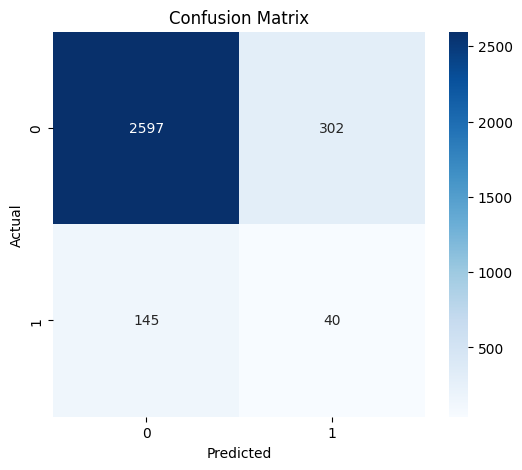

In [ ]:
# === Confusion Matrix & Classification Report ===
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
y_pred_probs = model.predict(X_test_top)

# === Find threshold with best recall (or balance) ===
prec, rec, thresholds = precision_recall_curve(y_test, y_pred_probs)
f1_scores = 2 * (prec[:-1] * rec[:-1]) / (prec[:-1] + rec[:-1] + 1e-8)
optimal_threshold = thresholds[np.argmax(f1_scores)]
print(f"\nOptimal Threshold (F1-oriented): {optimal_threshold:.2f}")

y_pred = (y_pred_probs >= optimal_threshold).astype(int)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

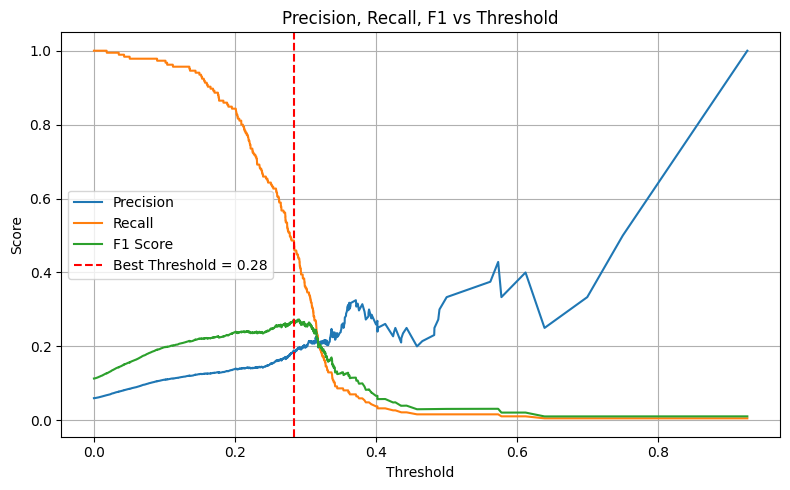

In [ ]:



# Plot
plt.figure(figsize=(8, 5))
plt.plot(thresholds, prec[:-1], label='Precision')
plt.plot(thresholds, rec[:-1], label='Recall')
plt.plot(thresholds, f1_scores, label='F1 Score')
plt.axvline(optimal_threshold, color='r', linestyle='--', label=f'Best Threshold = {optimal_threshold:.2f}')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision, Recall, F1 vs Threshold')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


END

In [ ]:
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train_res), y=y_train_res)
class_weights = dict(enumerate(class_weights))

In [ ]:
class_weights

{0: np.float64(0.8999655053466713), 1: np.float64(1.1250539025442001)}

In [ ]:
# === Build Deep Learning Model ===
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_res.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy', tf.keras.metrics.AUC(name='auc')])

# === Train Model ===
history = model.fit(X_train_res, y_train_res,
                    validation_split=0.2,
                    epochs=30,
                    batch_size=32,
                    class_weight=class_weights,
                    verbose=1)

Epoch 1/30
522/522 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7922 - auc: 0.8262 - loss: 0.4475 - val_accuracy: 0.9808 - val_auc: 0.0000e+00 - val_loss: 0.0408
Epoch 2/30
522/522 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9387 - auc: 0.9641 - loss: 0.1879 - val_accuracy: 0.9722 - val_auc: 0.0000e+00 - val_loss: 0.0509
Epoch 3/30
522/522 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9441 - auc: 0.9669 - loss: 0.1778 - val_accuracy: 0.9871 - val_auc: 0.0000e+00 - val_loss: 0.0225
Epoch 4/30
522/522 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9492 - auc: 0.9699 - loss: 0.1643 - val_accuracy: 0.9873 - val_auc: 0.0000e+00 - val_loss: 0.0245
Epoch 5/30
522/522 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9516 - auc: 0.9746 - loss: 0.1512 - val_accuracy: 0.9940 - val_auc: 0.0000e+00 - val_loss: 0.0120
Epoch 6/30
522/522 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9490 - auc: 0.9731 - loss: 0.1557 - val_accuracy: 0.9923 - val_auc: 0.0000e+00 - val_loss: 0.0135
Epoch 7/30
522/5

97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9217 - auc: 0.7797 - loss: 0.2358
Test Accuracy: 0.9277, AUC: 0.7849


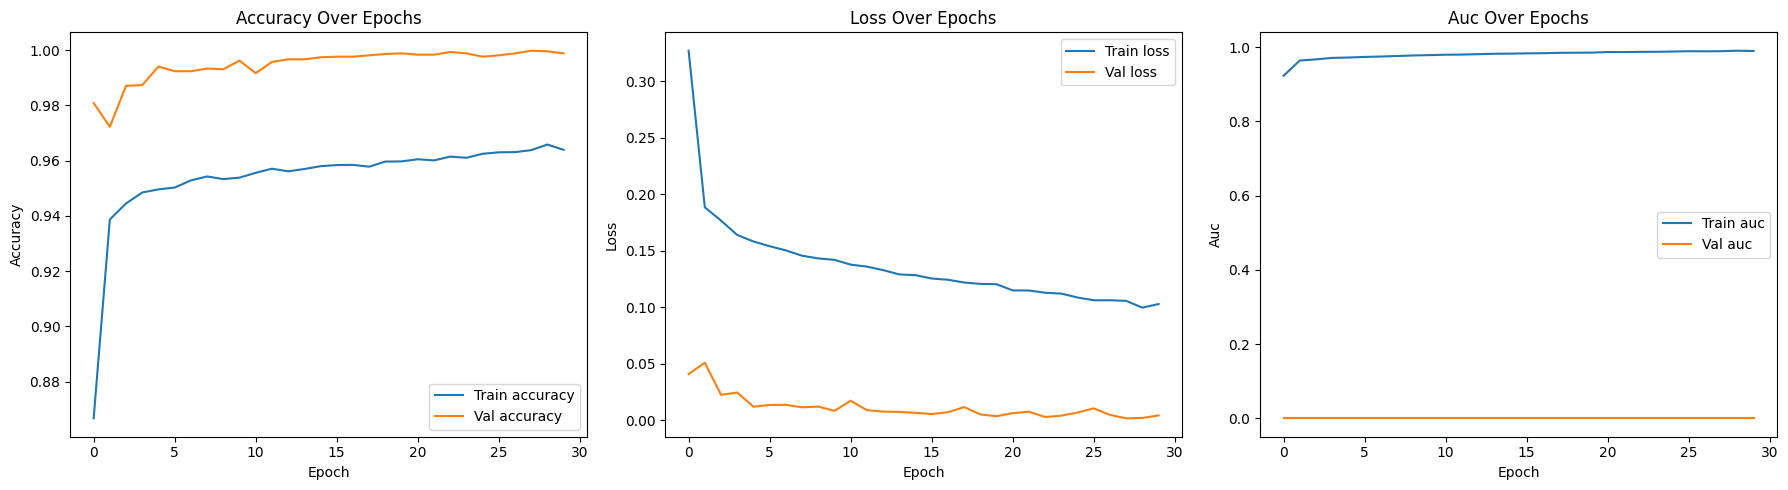

In [ ]:

# === Evaluate ===
loss, accuracy, auc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}, AUC: {auc:.4f}")

# === Plot Metrics ===
plt.figure(figsize=(18, 5))
for i, metric in enumerate(['accuracy', 'loss', 'auc']):
    plt.subplot(1, 3, i + 1)
    plt.plot(history.history[metric], label=f'Train {metric}')
    plt.plot(history.history[f'val_{metric}'], label=f'Val {metric}')
    plt.title(f'{metric.capitalize()} Over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel(metric.capitalize())
    plt.legend()
plt.tight_layout()
plt.show()

97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

Optimal Threshold (F1-oriented): 0.04

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.63      0.77      2899
           1       0.13      0.85      0.22       185

    accuracy                           0.65      3084
   macro avg       0.56      0.74      0.50      3084
weighted avg       0.93      0.65      0.74      3084



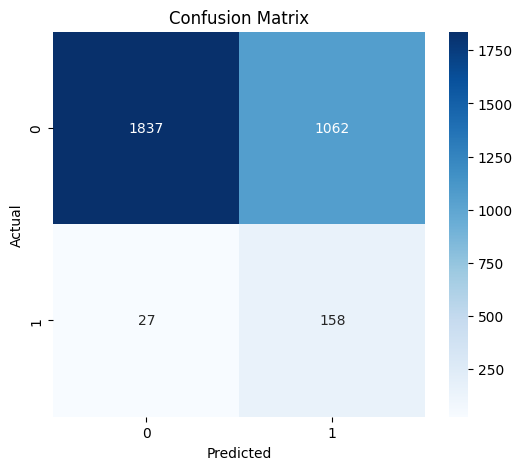

In [ ]:
# === Confusion Matrix & Classification Report ===
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
y_pred_probs = model.predict(X_test)

# === Find threshold with best recall (or balance) ===
prec, rec, thresholds = precision_recall_curve(y_test, y_pred_probs)
optimal_threshold = thresholds[np.argmax(rec * prec)]
print(f"\nOptimal Threshold (F1-oriented): {optimal_threshold:.2f}")

y_pred = (y_pred_probs >= optimal_threshold).astype(int)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
model2 = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_res.shape[1],)),
    Dropout(0.3), Dense(64, activation='relu'), Dropout(0.3),
    Dense(64, activation='relu'), Dropout(0.3),
    Dense(32, activation='relu'), Dense(32, activation='relu'),
    Dense(16, activation='relu'), Dense(1, activation='sigmoid')
])
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', tf.keras.metrics.AUC(name='auc')])
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history2 = model2.fit(X_train_res, y_train_res, validation_split=0.2, epochs=30, batch_size=32,class_weight=class_weights, callbacks=[early_stop], verbose=1)

Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


522/522 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7846 - auc: 0.8153 - loss: 0.4377 - val_accuracy: 0.9622 - val_auc: 0.0000e+00 - val_loss: 0.0663
Epoch 2/30
522/522 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9364 - auc: 0.9618 - loss: 0.1986 - val_accuracy: 0.9765 - val_auc: 0.0000e+00 - val_loss: 0.0373
Epoch 3/30
522/522 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9399 - auc: 0.9658 - loss: 0.1820 - val_accuracy: 0.9823 - val_auc: 0.0000e+00 - val_loss: 0.0299
Epoch 4/30
522/522 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9463 - auc: 0.9706 - loss: 0.1664 - val_accuracy: 0.9866 - val_auc: 0.0000e+00 - val_loss: 0.0260
Epoch 5/30
522/522 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9507 - auc: 0.9723 - loss: 0.1580 - val_accuracy: 0.9875 - val_auc: 0.0000e+00 - val_loss: 0.0215
Epoch 6/30
522/522 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9498 - auc: 0.9738 - loss: 0.1561 - val_accuracy: 0.9885 - val_auc: 0.0000e+00 - val_loss: 0.0225
Epoch 7/30
522/522 ━━━━━━━━

97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

Optimal Threshold (F1-oriented): 0.05

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.65      0.78      2899
           1       0.13      0.81      0.22       185

    accuracy                           0.66      3084
   macro avg       0.56      0.73      0.50      3084
weighted avg       0.93      0.66      0.75      3084



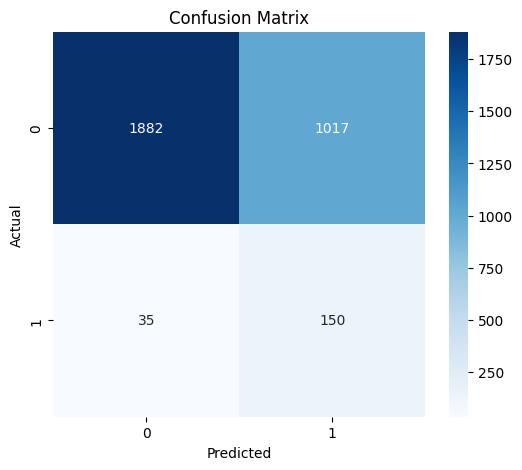

In [ ]:
# === Confusion Matrix & Classification Report ===
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
y_pred_probs = model2.predict(X_test)

# === Find threshold with best recall (or balance) ===
prec, rec, thresholds = precision_recall_curve(y_test, y_pred_probs)
optimal_threshold = thresholds[np.argmax(rec * prec)]
print(f"\nOptimal Threshold (F1-oriented): {optimal_threshold:.2f}")

y_pred = (y_pred_probs >= optimal_threshold).astype(int)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()